In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
df = pd.read_csv('03_Cleaned_File(Data Preprocessing).csv')

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,0,42,101348.88,0.00,1,1,2,1,1,0,0
1,15647311,Hill,608,0,41,112542.58,83807.86,1,1,1,1,0,0,1
2,15619304,Onio,502,0,42,113931.57,159660.80,3,0,8,0,1,0,0
3,15701354,Boni,699,0,39,93826.63,0.00,2,0,1,0,0,0,0
4,15737888,Mitchell,850,0,43,79084.10,125510.82,1,1,2,1,0,0,1


In [4]:
X = df.drop(columns = ['CustomerId', 'Surname', 'Exited'])
y = df['Exited']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 42)

In [6]:
X_train.head()

,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Geography_Germany,Geography_Spain
4032,601,0,42,199242.65,96763.89,1,1,4,1,0,1
4374,614,0,34,185561.89,0.00,2,0,5,0,0,0
6695,638,1,41,47675.29,131762.94,1,1,1,1,0,0
4896,544,0,40,161076.92,0.00,1,1,7,1,0,0
1101,512,0,32,80120.19,123403.85,2,0,2,0,1,0


In [7]:
columns = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance']
scaler = StandardScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

In [8]:
X_train.head()

,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Geography_Germany,Geography_Spain
4032,-0.512578,0,0.290520,1.719893,0.319718,1,1,4,1,0,1
4374,-0.377979,0,-0.467682,1.482642,-1.227900,2,0,5,0,0,0
6695,-0.129489,1,0.195745,-0.908576,0.879483,1,1,1,1,0,0
4896,-1.102743,0,0.100970,1.058026,-1.227900,1,1,7,1,0,0
1101,-1.434063,0,-0.657233,-0.345919,0.745790,2,0,2,0,1,0


In [9]:
model = LogisticRegression(random_state = 0, class_weight = 'balanced')
model

LogisticRegression(class_weight='balanced', random_state=0)

In [10]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [11]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1441,  527],
       [ 175,  357]], dtype=int64)

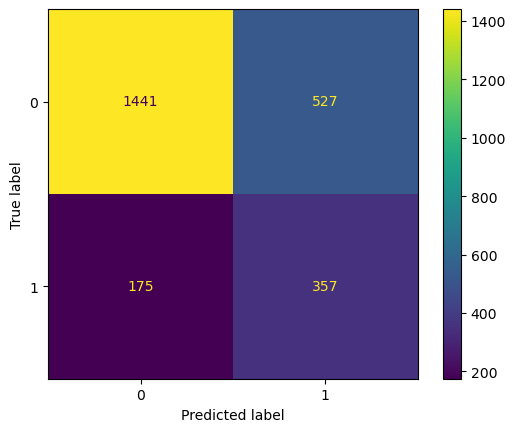

In [13]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [14]:
class0_accuracy = cm[0,0] / cm[0].sum()
class1_accuracy = cm[1,1] / cm[1].sum()
print(f"Class 0 Accuracy: {class0_accuracy:.2f}")
print(f"Class 1 Accuracy: {class1_accuracy:.2f}")

Class 0 Accuracy: 0.73
Class 1 Accuracy: 0.67


In [15]:
print(f'Accuracy : {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision : {precision_score(y_test, y_pred):.2f}')
print(f'Recall : {recall_score(y_test, y_pred):.2f}')
print(f'F1 Score : {f1_score(y_test, y_pred):.2f}')

Accuracy : 0.72
Precision : 0.40
Recall : 0.67
F1 Score : 0.50


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1968
           1       0.40      0.67      0.50       532

    accuracy                           0.72      2500
   macro avg       0.65      0.70      0.65      2500
weighted avg       0.79      0.72      0.74      2500

